# Ensemble Learning
1. Train different models on the same dataset
2. Let each model make its predictions
3. Meta-model: aggregates predictions of individual models
4. Final prediction: more robust and less prone to errors
5. Best results: models are skillful in different ways. Meaning that if some models make predictions that are way off, the other models should compensate these errors. In such case, the meta-model's predictions are more robust.

In [16]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Loading df
data = pd.read_csv('../_datasets/indian-liver-patient/indian_liver_patient_preprocessed.csv')
data = data.drop('Unnamed: 0', axis=1)

# Selecting data
X = data.iloc[:,:9].values
y = data.iloc[:,10].values

# Set seed for reproducibility
SEED=1

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)


# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

### Evaluating individual classifiers

In [17]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.678
K Nearest Neighbours : 0.661
Classification Tree : 0.678


Evaluating the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

In [18]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier


# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.661


Notice how the voting classifier achieves a test set accuracy greater than that achieved by LogisticRegression

### Bagging
Bagging: Bootstrap Aggregation  
Bagging uses a technique known as the bootstrap, bagging is used to reduce variance of individual models in the ensemble.  
  
Voting Classifier  
- same traing set
- /= algorithms
  
Bagging
- one algorithm
- /= subsets of the traing set

In [19]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier



# Seed
SEED = 1

# Instantiate dt
dt = DecisionTreeClassifier(random_state=SEED)

# Instantiate bc
bc = BaggingClassifier(estimator=dt, n_estimators=50, random_state=SEED, n_jobs=-1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred_dt = dt.predict(X_test)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test0 = accuracy_score(y_test, y_pred_dt)
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of dt: {:.2f}'.format(acc_test0)) 
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of dt: 0.63
Test set accuracy of bc: 0.67


A single tree dt would have achieved an accuracy of 66% which is 2% lower than bc's accuracy!

OOB: Out Of Bag
- On average, for each model, 63% of the training instances are sampled. The remaining 37% constitutes the OOB instances.

In [20]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

SEED = 1

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=SEED)

# Instantiate bc
bc = BaggingClassifier(estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=SEED,
            n_jobs=-1)

In [21]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.690, OOB accuracy: 0.711


The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%

## Random Forest (RF)
Random Forests is an ensemble method that uses a decision tree as a base estimator. In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set. Random forests introduces further randomization than bagging when training each of the base estimators. When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features.  
  
Random Forests: Training  
- Each tree forming the ensemble is trained on a different bootstrap sample from the training set. In addition, when a tree is trained, at each node, only d features are sampled from all features without replacement. The node is then split using the sampled feature that maximizes information gain. In scikit-learn d defaults to the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.
  
Random Forests: Prediction  
- Once trained, predictions can be made on new instances. When a new instance is fed to the different base estimators, each of them outputs a prediction. The predictions are then collected by the random forests meta-classifier and a final prediction is made depending on the nature of the problem.  
  
Random Forests: Classification & Regression  
- For classification, the final prediction is made by majority voting. The corresponding scikit-learn class is RandomForestClassifier. For regression, the final prediction is the average of all the labels predicted by the base estimators. The corresponding scikit-learn class is RandomForestRegressor. In general, Random Forests achieves a lower variance than individual trees.  
  
> **Classification**: Aggrregates predictions by majority voting  
> sklearn.ensemble.RandomForestClassifier in scikit-learn
> 
> **Regression**: Aggregates predictions through averaging  
> sklearn.ensemble.RandomForestRegressor in scikit-learn
  
Feature Importance  
- When a tree based method is trained, the predictive power of a feature or its importance can be assessed. In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity. Note that the importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction.  
- Once you train a tree-based model in scikit-learn, the features importances can be accessed by extracting the feature_importance_ attribute from the model.
- To visualize the importance of features as assessed by rf, you can create a pandas series of the features importances and then sort this series and make a horiztonal-barplot.



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



# Load df
data = pd.read_csv('../_datasets/bikes.csv')

# X,y split
X = data.loc[:, data.columns != 'cnt'].values  # Selecting all columns except the target
y = data['cnt'].values

# Seed
SEED = 2

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)

# Instantiate rf with 25 trees
rf = RandomForestRegressor(n_estimators=25,
            random_state=SEED)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

Next comes the test set RMSE evaluation part.

In [23]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


Lets take a comparison look and train a single CART on the same dataset.

In [24]:
# Import a single CART (any single CART is fine, I just picked this one)
from sklearn.tree import DecisionTreeRegressor


# Seed
SEED = 2

# Initialize 
dt = DecisionTreeRegressor()

# Fit rf to the training set    
dt.fit(X_train, y_train)

# Predict the test set labels
y_pred_dt = dt.predict(X_test)

# Evaluate the test set RMSE
rmse_test_dt = MSE(y_test,y_pred_dt)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_dt))

Test set RMSE of rf: 78.42


The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART

### Visualizing features importances

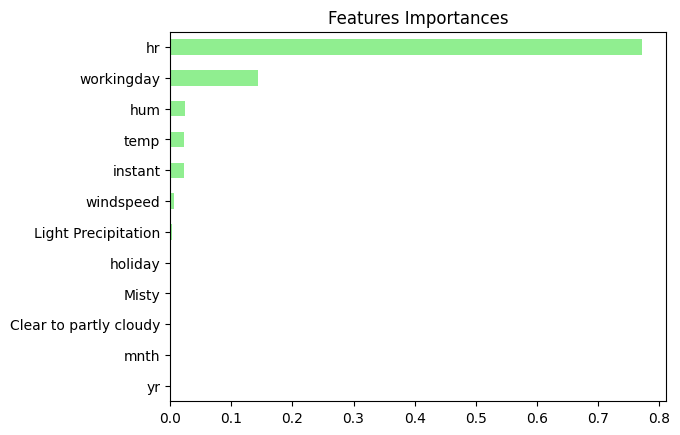

In [25]:
import pandas as pd
import matplotlib.pyplot as plt



# Features
feat = data.loc[:, data.columns != 'cnt']

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= feat.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

We can see that hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%.

## Adaboost
Boosting refers to an ensemble method in which many predictors are trained and each predictor learns from the errors of its predecessor. More formally, in boosting many weak learners are combined to form a strong learner. A weak learner is a model doing slightly better than random guessing. For example, a decision tree with a maximum-depth of one, known as a decision-stump, is a weak learner.  
In boosting, an ensemble of predictors are trained sequentially and each predictor tries to correct the errors made by its predecessor.  
  
- **AdaBoost**: stands for Adaptive Boosting. In AdaBoost, each predictor pays more attention to the instances wrongly predicted by its predecessor by constantly changing the weights of training instances.  
- Each predictor is assigned a coefficient alpha that weighs its contribution in the ensemble's final prediction. Alpha depends on the predictor's training error.  
  
---
  
AdaBoost: Training
- Once all the predictors in the ensemble are trained, the label of a new instance can be predicted depending on the nature of the problem.  
- There are N predictors in total. 
- First, predictor1 is trained on the initial dataset (X,y), and the training error for predictor1 is determined. This error can then be used to determine alpha1 which is predictor1's coefficient. 
- Alpha1 is then used to determine the weights W(2) of the training instances for predictor2. When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances. When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances.
- This process is repeated sequentially, until the N predictors forming the ensemble are trained.
  
AdaBoost: Learning Rate
- An important parameter used in training is the learning rate, eta. Eta is a number between 0 and 1; it is used to shrink the coefficient alpha of a trained predictor. It's important to note that there's a trade-off between eta and the number of estimators. A smaller value of eta should be compensated by a greater number of estimators.
- Eta is denoted by **η** or **H**
  
AdaBoost: Prediction
- Classification: Each predictor predicts the label of the new instance and the ensemble's prediction is obtained by weighted majority voting.  
- Regression: The same procedure is applied and the ensemble's prediction is obtained by performing a weighted average.
- It's important to note that individual predictors need not to be CARTs. However CARTs are used most of the time in boosting because of their high variance.
> **Classification**: Aggrregates predictions by majority voting  
> sklearn.ensemble.AdaBoostClassifier in scikit-learn
> 
> **Regression**: Aggregates predictions through weighted averaging  
> sklearn.ensemble.AdaboostRegressor in scikit-learn

In [26]:
import pandas as pd

# Import train_test_split
from sklearn.model_selection import train_test_split
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier



# Loading df
data = pd.read_csv('../_datasets/indian-liver-patient/indian_liver_patient_preprocessed.csv')
data = data.drop('Unnamed: 0', axis=1)

# Selecting data
X = data.iloc[:,:9].values
y = data.iloc[:,10].values

# Set seed for reproducibility
SEED = 1

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=SEED)

# Instantiate ada
ada = AdaBoostClassifier(estimator=dt, n_estimators=180, random_state=SEED)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

### Evaluate the AdaBoost classifier

In [27]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score


# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.66


This untuned AdaBoost classifier achieved an ROC AUC score of 0.66

## Gradient Boosting (GB)
In gradient boosting, each predictor in the ensemble corrects its predecessor's error. In contrast to AdaBoost, the weights of the training instances are not tweaked. Instead, each predictor is trained using the residual errors of its predecessor as labels.  
- Does not tweak the weights of training instances
- Each predictor is trained using its predecessor's residual errors as labels.
- Gradiant Boosted trees use a CART as the base learner.
  
---
Gradient Boosted Trees for Regression: Training
- The ensemble consists of N trees. Tree1 is trained using the features matrix X and the dataset labels y. The predictions labeled y1hat are used to determine the training set residual errors r1.
- Tree2 is then trained using the features matrix X and the residual errors r1 of Tree1 as labels. The predicted residuals r1hat are then used to determine the residuals of residuals which are labeled r2.
- This process is repeated until all of the N trees forming the ensemble are trained.
  
Gradient Boosted: Shrinkage
- An important parameter used in training gradient boosted trees is shrinkage.
- In this context, shrinkage refers to the fact that the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate eta which is a number between 0 and 1.
- Similarly to AdaBoost, there's a trade-off between eta and the number of estimators. Decreasing the learning rate needs to be compensated by increasing the number of estimators in order for the ensemble to reach a certain performance.
  
Gradient Boosted Trees: Prediction
- Once all trees in the ensemble are trained, prediction can be made. When a new instance is available, each tree predicts a label and the final ensemble prediction is given.
- In scikit-learn, the class for a gradient boosting regressor is GradientBoostingRegressor.
- The class implementing gradient-boosted-classification in scikit-learn is GradientBoostingClassifier.
> **Classification**: Aggrregates predictions by majority voting  
> sklearn.ensemble.GradientBoostingRegressor in scikit-learn
> 
> **Regression**: Aggregates predictions through weighted averaging  
> sklearn.ensemble.GradientBoostingClassifier in scikit-learn

### Define and Train the GB regressor

In [28]:
import pandas as pd

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Load df
data = pd.read_csv('../_datasets/bikes.csv')

# Seed
SEED = 2

# X,y split
X = data.loc[:, data.columns != 'cnt'].values  # Selecting all columns except the target
y = data['cnt'].values

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= SEED)

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=SEED)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

### Evaluate the GB regressor

In [29]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE


# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.537


Gradient Boosting: Cons
- GB involves an exhaustive search procedure
- Each CART (Classification and Regression Tree) is trained to find the best split points and features
- May lead to CART's using the same split points and maybe the same features
  
Solution: Stochastic Gradient Boosting (SGB)

## Stochastic Gradient Boosting (SGB)
In stochastic gradient boosting, each CART is trained on a random subset of the training data. This subset is sampled without replacement. Furthermore, at the level of each node, features are sampled without replacement when choosing the best split-points. As a result, this creates further diversity in the ensemble and the net effect is adding more variance to the ensemble of trees.
- Each tree is trained on a random subset of rows within the training data
- The sampled instances (40% - 80% of the training set) are sampled without replacement
- Features are sampled (without replacement) when choosing split points
- Result: further ensemble diversity
- Effect: adding further variance to the ensemble of trees
---
  
Stochastic Gradient Boosting: Training
- First, instead of providing all the training instances to a tree, only a fraction of these instances are provided through sampling without replacement. The sampled data is then used for training a tree.
- However, not all features are considered when a split is made. Instead, only a certain randomly sampled fraction of these features are used for this purpose.  
- Once a tree is trained, predictions are made and the residual errors can be computed. These residual errors are multiplied by the learning rate eta and are fed to the next tree in the ensemble.  
- This procedure is repeated sequentially until all the trees in the ensemble are trained.
- The prediction procedure for a new instance in stochastic gradient boosting is similar to that of gradient boosting.
- SGB is preformed by using **sklearn.ensemble.GradientBoostingRegressor**, Then throwing the hyperparameter 'subsample=' into the instantiation. Setting subsample=0.8 would make each tree randomly sample 80% of the data.

### Regression with SGB

In [30]:
import pandas as pd

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Load df
data = pd.read_csv('../_datasets/bikes.csv')

# Seed
SEED = 2

# X,y split
X = data.loc[:, data.columns != 'cnt'].values  # Selecting all columns except the target
y = data['cnt'].values

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= SEED)

# Instantiate sgbr
sgbr = GradientBoostingRegressor(
    max_depth=4, 
    subsample=0.9,
    max_features=0.75,
    n_estimators=200,
    random_state=SEED
    )


### Train and Test the SGB regressor

In [31]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE


# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.260


Test set RMSE of gb: 49.537  
Test set RMSE of sgbr: 47.260  
  
The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor